**Essa prática usará apenas dois componentes, um produtor que manda a 
frase Hello World para a fila de mensagens e um consumidor que notificar o recebimento dela.**

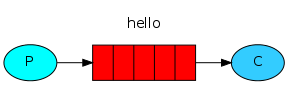

In [ ]:

#!/usr/bin/env python
import pika

connection = pika.BlockingConnection(
    pika.ConnectionParameters(host='localhost'))
channel = connection.channel()

channel.queue_declare(queue='hello')

channel.basic_publish(exchange='', routing_key='hello', body='Hello World!')
print(" [x] Sent 'Hello World!'")
connection.close()


In [ ]:
#!/usr/bin/env python
import pika, sys, os

def main():
    connection = pika.BlockingConnection(pika.ConnectionParameters(host='localhost'))
    channel = connection.channel()

    channel.queue_declare(queue='hello')

    def callback(ch, method, properties, body):
        print(" [x] Received %r" % body.decode())

    channel.basic_consume(queue='hello', on_message_callback=callback, auto_ack=True)

    print(' [*] Waiting for messages. To exit press CTRL+C')
    channel.start_consuming()

if __name__ == '__main__':
    try:
        main()
    except KeyboardInterrupt:
        print('Interrupted')
        try:
            sys.exit(0)
        except SystemExit:
            os._exit(0)

**Outra forma de fazer o mesmo procedimento  é usando o comando do python no próprio bash, como veremos a seguir...**

In [ ]:
!pwd

In [ ]:
!python3 send.py

In [ ]:
!python3 receive.py